# Recommendation System

## Objective:

The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 

## Dataset:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.
Number of community members for each anime.

Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

## Tasks:

### Data Preprocessing:

#### Load the dataset into a suitable data structure (e.g., pandas DataFrame).

In [216]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [217]:
df = pd.read_csv('./anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#### Handle missing values, if any.

In [218]:
# Checking for Missing Data
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [219]:
# There are few Missing values
# Since there proportion is less and no particular way to impute categorical data
# hence dropping missing values
df.dropna(inplace=True)
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [220]:
# Checking for Duplicate Rows
df.duplicated().sum()

0

#### Explore the dataset to understand its structure and attributes.

In [221]:
# Checking for feature datatypes
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [222]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [223]:
# Converting episodes to integer
import numpy as np
df['episodes'].replace('Unknown', np.nan, inplace=True)
df['episodes'] = df['episodes'].astype('float')
df.dropna(inplace=True)
df['episodes'].astype('int64')

0         1
1        64
2        51
3        24
4        51
         ..
12289     1
12290     1
12291     4
12292     1
12293     1
Name: episodes, Length: 11830, dtype: int64

In [224]:
# Statistical Summary
df.describe()

,anime_id,episodes,rating,members
count,11830.000000,11830.000000,11830.000000,1.183000e+04
mean,13404.150211,12.486729,6.484609,1.851100e+04
std,11110.087616,47.097131,1.019147,5.537144e+04
min,1.000000,1.000000,1.670000,1.200000e+01
25%,3326.250000,1.000000,5.892500,2.322500e+02
50%,9820.500000,2.000000,6.570000,1.589500e+03
75%,23302.500000,12.000000,7.190000,9.832000e+03
max,34519.000000,1818.000000,10.000000,1.013917e+06


In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

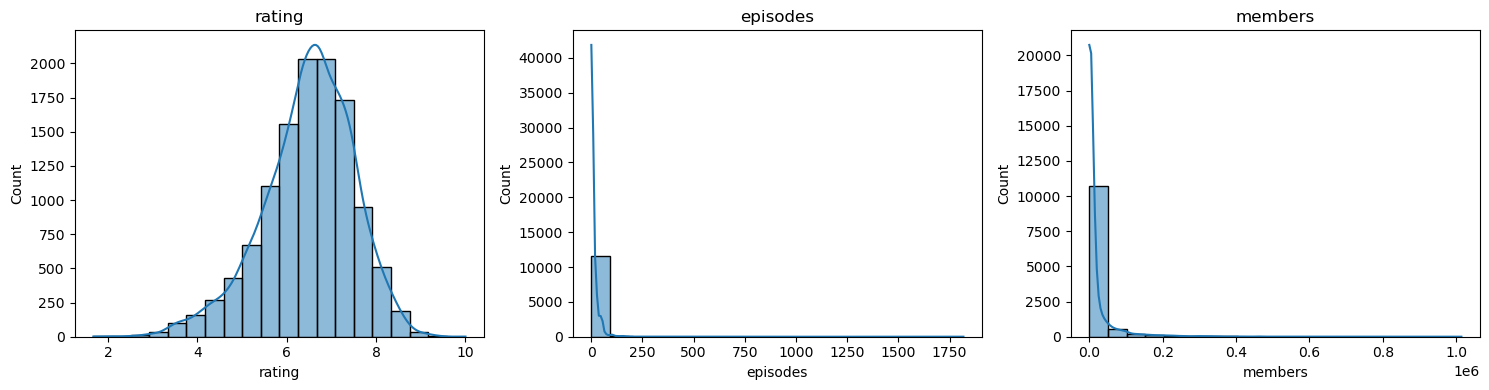

In [226]:
# Checking for the type of Distribution of Variables:

plt.figure(figsize=(15, 4))
for i, col in enumerate(df[['rating', 'episodes', 'members']]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

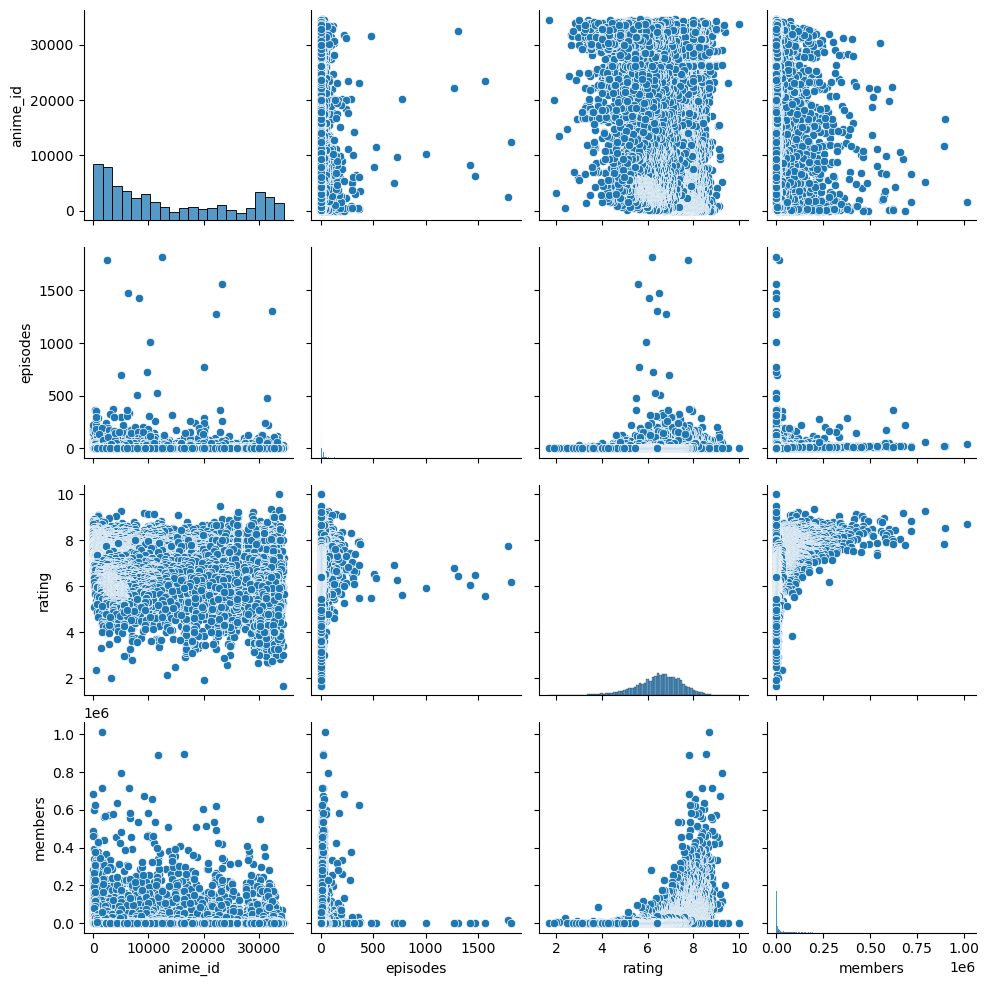

In [227]:
# Analysis Correlations
sns.pairplot(df)

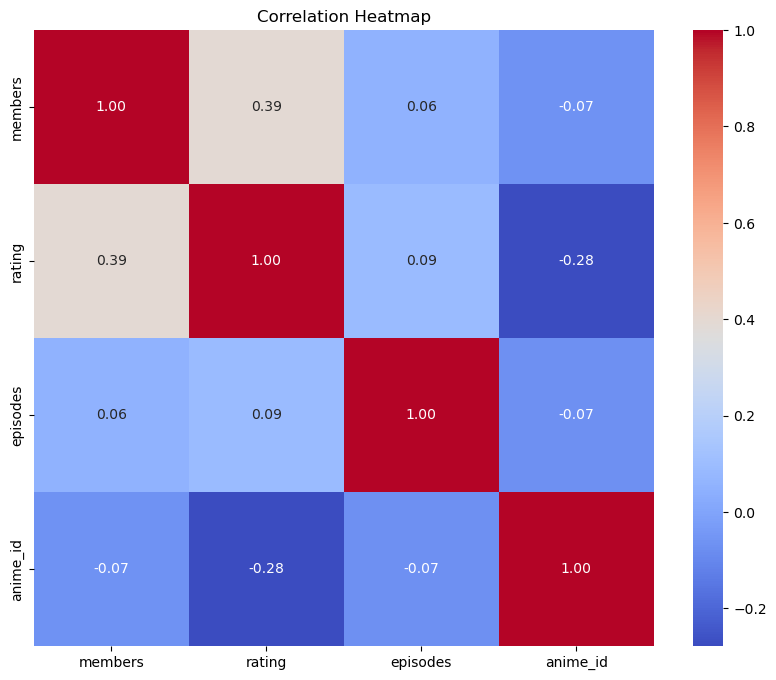

In [228]:
# Checking Correlation using Heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(df[['members', 'rating', 'episodes', 'anime_id']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


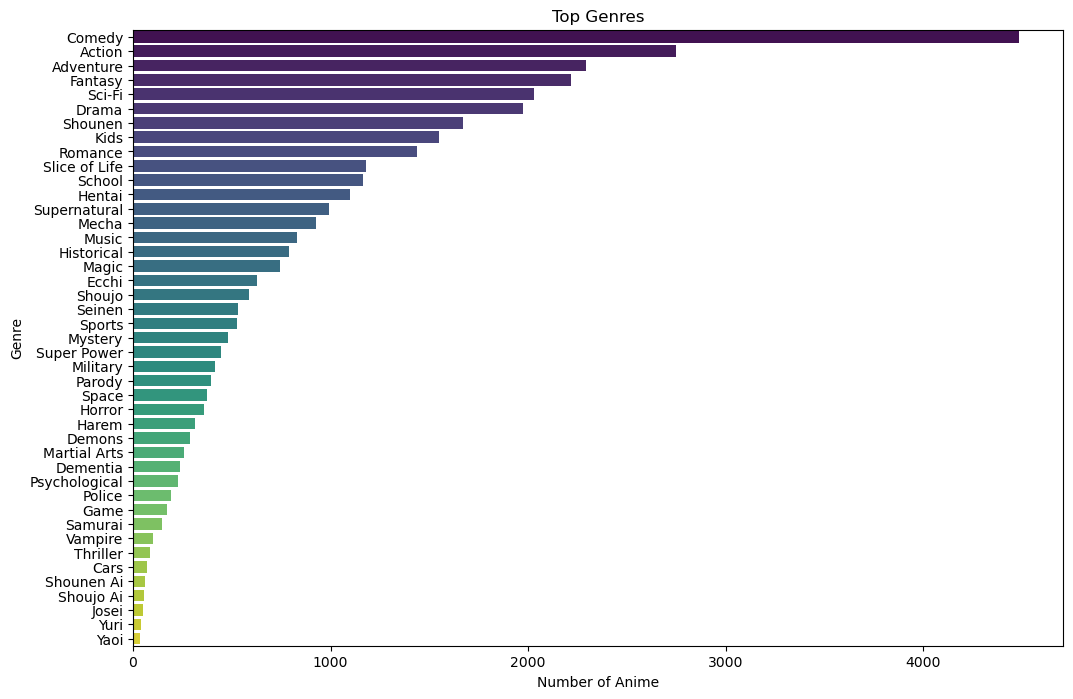

In [229]:
# Genre analysis
genre_counts = df['genre'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top Genres')
plt.xlabel('Number of Anime')
plt.ylabel('Genre')
plt.show()

In [230]:
# Resetting Index after Deleting Missing Values
df.reset_index(inplace=True)

### Feature Extraction:

#### Convert categorical features into numerical representations if necessary.

In [231]:
# Converting categorical features into numerical representations
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
encoded_type = one_hot_encoder.fit_transform(df[['type']])
encoded_type_df = pd.DataFrame(encoded_type, columns=one_hot_encoder.get_feature_names_out(['type']))

display(encoded_type_df)

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
11825,0.0,0.0,0.0,1.0,0.0,0.0
11826,0.0,0.0,0.0,1.0,0.0,0.0
11827,0.0,0.0,0.0,1.0,0.0,0.0
11828,0.0,0.0,0.0,1.0,0.0,0.0


In [232]:
# Converting Genre feature using count vector
from sklearn.feature_extraction.text import CountVectorizer
genre_list = df['genre'].str.split(', ').apply(lambda x: ' '.join(x))
count_vectorizer = CountVectorizer()
genre_matrix = count_vectorizer.fit_transform(genre_list)
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
genre_df

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalize numerical features if required.

In [233]:
# Normalizing Numerical Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = df[['episodes', 'rating', 'members']]
normalized_features = scaler.fit_transform(numerical_features)
normalized_features_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)
normalized_features_df

,episodes,rating,members
0,0.000000,0.924370,0.197867
1,0.034673,0.911164,0.782769
2,0.027518,0.909964,0.112683
3,0.012658,0.900360,0.664323
4,0.027518,0.899160,0.149180
...,...,...,...
11825,0.000000,0.297719,0.000196
11826,0.000000,0.313325,0.000169
11827,0.001651,0.385354,0.000204
11828,0.000000,0.397359,0.000161


In [234]:
# Combining all features into single dataframe
features_df = pd.concat([encoded_type_df, genre_df, normalized_features_df], axis=1)
display(features_df)

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,action,adventure,ai,arts,...,sports,super,supernatural,thriller,vampire,yaoi,yuri,episodes,rating,members
0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0.000000,0.924370,0.197867
1,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0.034673,0.911164,0.782769
2,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0.027518,0.909964,0.112683
3,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0.012658,0.900360,0.664323
4,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0.027518,0.899160,0.149180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.297719,0.000196
11826,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.313325,0.000169
11827,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.001651,0.385354,0.000204
11828,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.397359,0.000161


### Recommendation System:

#### Design a function to recommend anime based on cosine similarity.

In [235]:
# Building Recommendation System
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(anime_title, features_df, df, top_n=5):
    ''' Recommendation Algorithm'''

    # Find the index of the given anime title
    anime_index = df[df['name'] == anime_title].index[0]

    # Compute cosine similarity between the given anime and all other anime
    similarity_scores = cosine_similarity(features_df.iloc[anime_index].values.reshape(1, -1), features_df)[0]

    # Getting the indices of top similar anime (excluding itself)
    # Sorting the recommendation indices in descending order
    similar_anime_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]

    # Getting the titles of top similar anime
    similar_anime_titles = df.iloc[similar_anime_indices]['name'].values

    return similar_anime_titles

#### Given a target anime, recommend a list of similar anime based on cosine similarity scores.

In [236]:
# Calling Function
anime_name = 'Kimi no Na wa.'
recommended_anime = recommend_anime(anime_name, features_df, df)
print(f'Recommended anime for {anime_name}:\n')
for i, anime in enumerate(recommended_anime):
    print(i, anime)

Recommended anime for Kimi no Na wa.:

0 Aura: Maryuuin Kouga Saigo no Tatakai
1 Kokoro ga Sakebitagatterunda.
2 Harmonie
3 Air Movie
4 Hotarubi no Mori e


#### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [237]:
# Calling Function (Top 10)
anime_name = 'Violence Gekiga David no Hoshi'
recommended_anime = recommend_anime(anime_name, features_df, df, top_n=10)
print(f'Recommended anime for {anime_name}:\n')
for i, anime in enumerate(recommended_anime):
    print(i, anime)

Recommended anime for Violence Gekiga David no Hoshi:

0 Wake Up! Aria: Majokko Virgin Kiki Ippatsu
1 Henbou Moral Hazard
2 Youbi Masochist Animation
3 Happy Day
4 Yayoi
5 Maid Meshimase
6 Silent Chaser Kagami
7 Sei Michaela Gakuen Hyouryuuki II
8 Violence Gekiga Shin David no Hoshi: Inma Densetsu
9 Bishoujo Animerama: Miyuki-chan SOS-H Shichauzo


In [238]:
# Calling Function (Top 3)
anime_name = 'Under World'
recommended_anime = recommend_anime(anime_name, features_df, df, top_n=3)
print(f'Recommended anime for {anime_name}:\n')
for i, anime in enumerate(recommended_anime):
    print(i, anime)

Recommended anime for Under World:

0 Tenshi no Habataki Jun
1 The Satisfaction
2 Hokenshitsu de Aimashou
